<a href="https://colab.research.google.com/github/jhmsoriano/FTW_Activities/blob/main/Titanic_Data_Prep_EDA_ML_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Data Preparation, EDA, and Machine Learning with Python

We will be cleansing and preparing the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic) for exploration and modeling.


### The Data
For this case, we'll be using the titanic_train.csv file and transform it into a pandas dataframe.

**This activity is categorized into the following steps:**

- Importing libraries
- Getting the dataset
- Finding Missing Data
- Data Cleaning
- Exploratory Data Analysis
- Using Machine Learning, specifically Logistic Regression model

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Getting the dataset

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/jhmsoriano/FTW_Activities/main/Data%20Prep/train.csv')

# calling this train since the actual titanic dataset comes in a zip file of 3 files: train, test, and gender

In [3]:
# display the first few rows of the dataframe 
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# display the last few rows of the dataframe 
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# print columns 
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

We can use the following Python functions to further explore our data.

In [6]:
# quick look at our dataset, data types, and number of nulls
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# rows , colunms --> get the size of the dataframe 
train.shape

(891, 12)

In [8]:
# to better understand the numeric data, we want to use the .describe() method
# This gives us an understanding of the central tendencies of the data 

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# quick way to separate numeric columns
train.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [12]:
# look at numeric and categorical values separately 
df_num = train[['Age','SibSp','Parch','Fare']]
df_cat = train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

# We will need to convert numerical columns such as Survived and Pclass as categorical as each number represents a label (and it will not make sense for the numbers to be aggregated).

In [13]:
df_num

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500
...,...,...,...,...
886,27.0,0,0,13.0000
887,19.0,0,0,30.0000
888,NaN,1,2,23.4500
889,26.0,0,0,30.0000


In [14]:
df_cat

,Survived,Pclass,Sex,Ticket,Cabin,Embarked
0,0,3,male,A/5 21171,NaN,S
1,1,1,female,PC 17599,C85,C
2,1,3,female,STON/O2. 3101282,NaN,S
3,1,1,female,113803,C123,S
4,0,3,male,373450,NaN,S
...,...,...,...,...,...,...
886,0,2,male,211536,NaN,S
887,1,1,female,112053,B42,S
888,0,3,female,W./C. 6607,NaN,S
889,1,1,male,111369,C148,C


In [15]:
#Checking if there are other categories under Sex column
df_cat['Sex'].unique()

array(['male', 'female'], dtype=object)

## Finding Missing Data

We'll be using seaborn to create a simple heatmap to identify any missing data.

In [16]:
# Check number of null values in a column

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

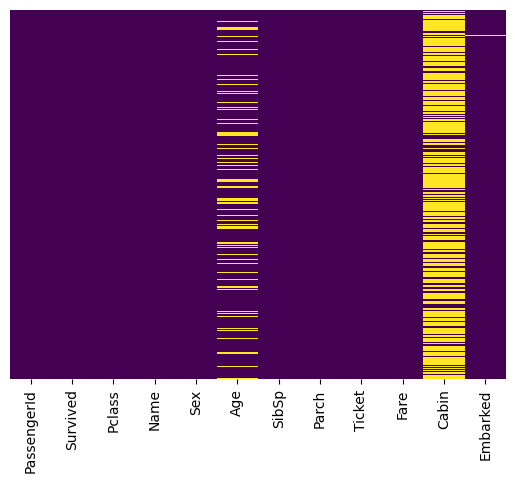

In [17]:
#Let's visualize the missing values
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Based from the heatmap, we can see that the ‘Cabin’ column has the most number of missing values. For this example, we will be dropping it.

In [18]:
train.drop('Cabin',axis=1,inplace=True)

<Axes: >

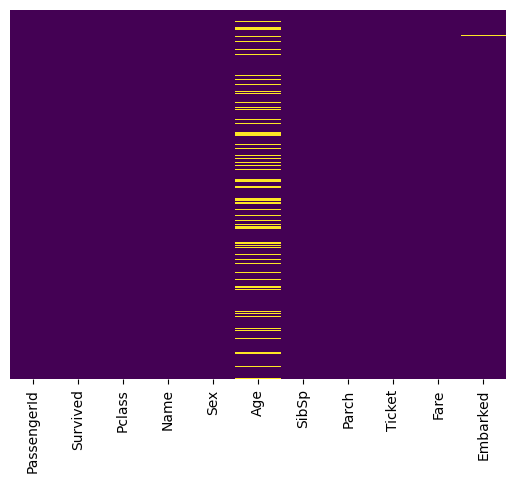

In [19]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20% (177 out of 891) of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation.

In [20]:
# Check number of null values in a column

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Data Cleaning


We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However, we can be smarter about this and check the average age by passenger class. For example:

<Axes: xlabel='Pclass', ylabel='Age'>

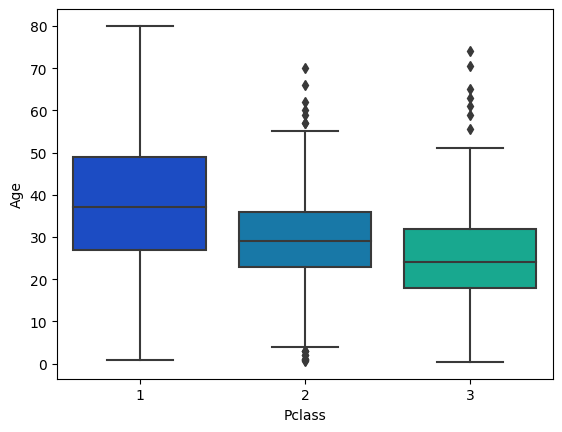

In [22]:
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [25]:
train.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [26]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 29

        else:
            return 25

    else:
        return Age

Time to apply the function:

In [27]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [28]:
# Check number of null values in a column

train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Let's go ahead and drop the rows in Embarked that have missing values.

In [29]:
train.dropna(inplace=True)

In [30]:
# Check number of null values in a column

train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


### Convert Data Types

Change age from float to integer

In [32]:
train['Age'] = train['Age'].astype(int)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C


In [33]:
train['Age'].info()

<class 'pandas.core.series.Series'>
Int64Index: 889 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype
--------------  -----
889 non-null    int64
dtypes: int64(1)
memory usage: 13.9 KB


# Exploratory Data Analysis (EDA)

Let's take a deeper look into the numerical data that we have. How are these columns distributed?

In [35]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.190101,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.185991,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Detecting Outliers

<Axes: xlabel='Age'>

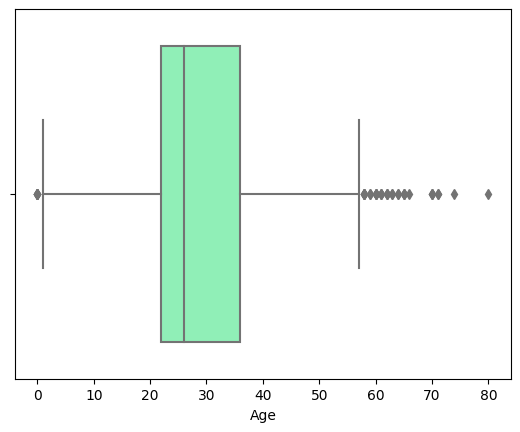

In [36]:
sns.boxplot(data=train, x='Age', palette='rainbow')

A large portion of the passengers' **age** in the given data set ranged from 22 to 36 years old.

<Axes: xlabel='Fare', ylabel='Count'>

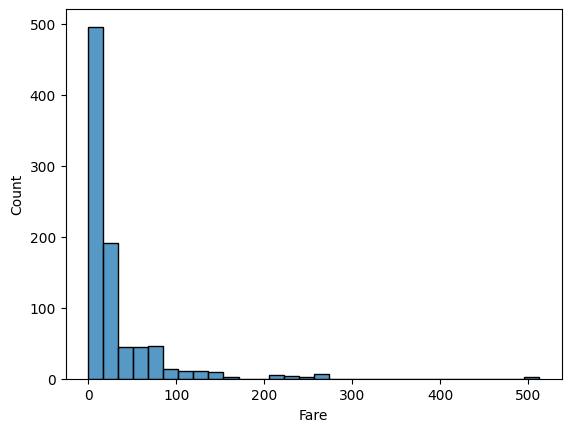

In [37]:
sns.histplot(data = train, x='Fare', bins = 30)

<Axes: xlabel='Fare'>

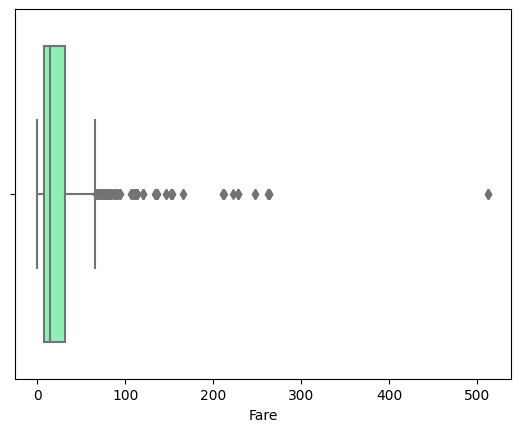

In [38]:
sns.boxplot(data = train, x = 'Fare', palette='rainbow')

In [39]:
#Checking fares more than 500
train[train['Fare'] > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35,0,0,PC 17755,512.3292,C


As expected, the passengers with the **highest fare amount** belonged to passengers from the first class. It can also be seen that they are under the same flight ticket.

<Axes: xlabel='SibSp', ylabel='count'>

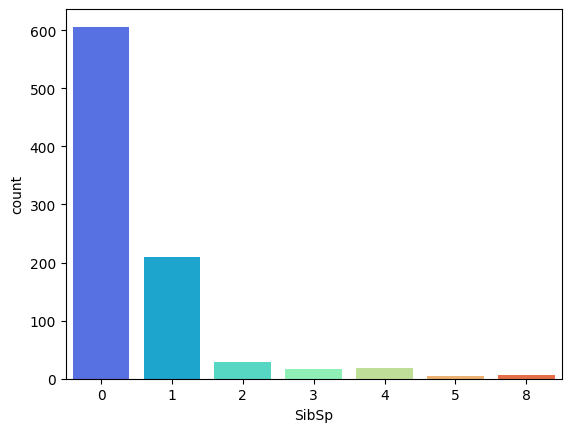

In [40]:
sns.countplot(x='SibSp', data=train, palette='rainbow')

A huge portion of the passengers were solo travellers.

## Other explorations

Let's see what else we can find from our data.

Text(0.5, 1.0, 'Count of passengers who Did not Survived vs Survived')

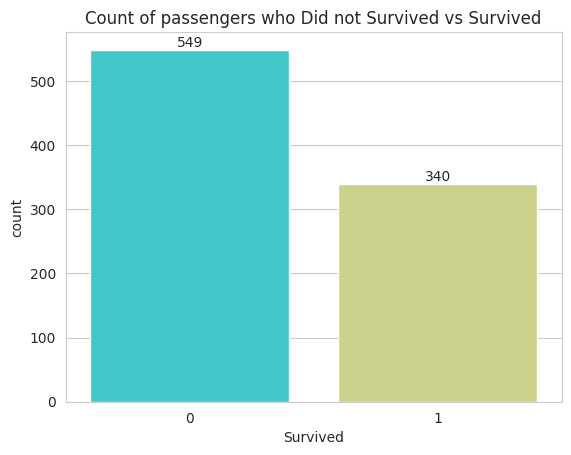

In [42]:
#Number of passengers who didn't survived (0) vs. survived (1)
ax = sns.countplot(x='Survived', data=train, palette='rainbow')

abs_values = train['Survived'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)

# Set the title
plt.title('Count of passengers who Did not Survived vs Survived')

Unfortunately, majority (61.75%) of the passengers did not survive from the Titanic incident. If we try to break them down according to Passenger class, we can see below that those who did not survive came mostly from the lower class.

[Text(0.5, 1.0, 'Passengers accdg to Pclass')]

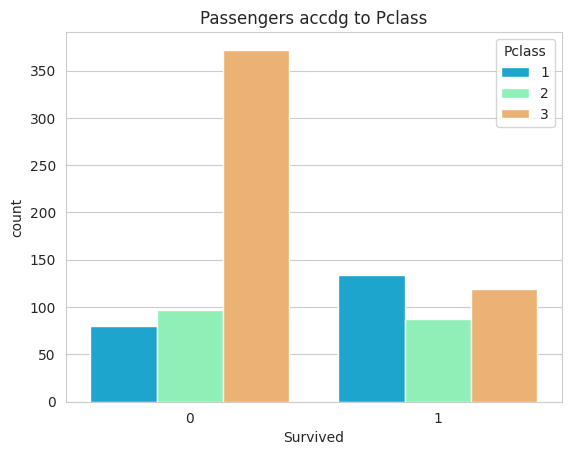

In [46]:
sns.countplot(x='Survived',hue='Pclass',data=train, palette='rainbow').set(title='Passengers accdg to Pclass')

[Text(0.5, 1.0, 'Passengers accdg to Pclass')]

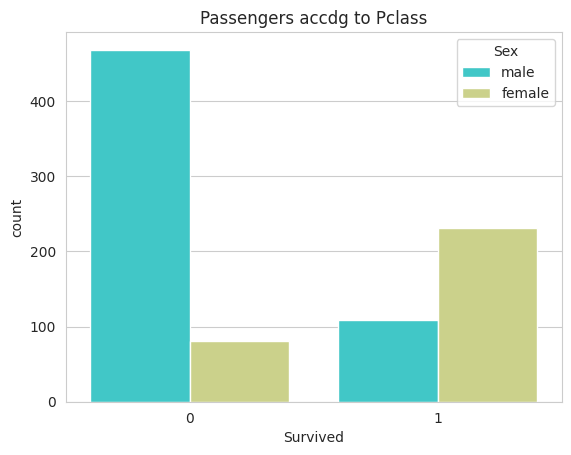

In [48]:
sns.countplot(x='Survived',hue='Sex',data=train, palette='rainbow').set(title='Passengers accdg to Pclass')

In terms of sex/gender, most of the passengers who did not were male and those with higher survival rate were female. 

## Converting Categorical Features

Before we attempt to use a machine learning algorithm, we'll need to convert categorical features to dummy variables.

In [49]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


In [50]:
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [51]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [53]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [54]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C


In [55]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [56]:
train = pd.concat([train,sex,embark],axis=1)

In [57]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22,1,0,7.2500,1,0,1
1,2,1,1,38,1,0,71.2833,0,0,0
2,3,1,3,26,0,0,7.9250,0,0,1
3,4,1,1,35,1,0,53.1000,0,0,1
4,5,0,3,35,0,0,8.0500,1,0,1


#Using Machine Learning

For this example, we'll be using a Logistic Regression model and we'll start by splitting our data into a training set and test set.

##Train Test Split

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

##Training and Predicting

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
predictions = logmodel.predict(X_test)

In [63]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

## Evaluation

Let's move on to evaluate our model. We can check precision, recall, f1-score, and accuracy using classification report.

In [64]:
from sklearn.metrics import classification_report

In [65]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       163
           1       0.81      0.61      0.69       104

    accuracy                           0.79       267
   macro avg       0.80      0.76      0.77       267
weighted avg       0.79      0.79      0.78       267



From our classification report, we can take note of the following:

**Precision:** 78% of the instances predicted as 0 (did not survive) are actually 0, while for 1 (survived), 81% of the instances predicted as 1 are actually 1.

**Recall:** 91% of the actual instances of 0 are correctly classified by the model, while for 1, 61% of the actual instances of 1 are correctly classified by the model.

**F1-score:** It is the harmonic mean of precision and recall, and provides a balanced measure of the model's performance. In this case, the F1-score for class 0 is 0.84, while for class 1 it is 0.69.

**Accuracy:** The overall accuracy of the model that it correctly classified is 79% of the instances in the test data.

In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
confusion_matrix(y_test,predictions)

array([[148,  15],
       [ 41,  63]])

In the matrix:

1. There are 148 True Negatives (TN), meaning that the model correctly predicted 148 instances/passengers that did not survive (0).
2. There are 15 False Positives (FP), meaning that the model incorrectly predicted 15 instances/passengers who survived (1) when they actually did not (0).
3. There are 41 false negatives (FN), meaning 41 instances/passengers were tagged as did not survive (0) when they actually did survive (1).
4. Lastly, there are 63 True Positives (TP), meaning 63 instances/passengers were correctly predicted as those who survived (1).